<a href="https://colab.research.google.com/github/EsserMishelle/DataScience/blob/main/yelp_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, my friend and I decide to break into the industry and open up my own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, I want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While I know my food will be delicious, I believe there are other factors that play into a Yelp rating and will ultimately determine my business's success. With a dataset of different restaurant features and their Yelp ratings, I've decided to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for my restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Let's get started by exploring the data in each of these files to see what we are working with.

## Load the Data and Take a Peek


In [ ]:
import pandas as pd
import numpy as np

businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [ ]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Let's inspect the first five rows of each DataFrame using the `.head()` method and also the datatype using dtypes to get an overview of the data.

In [ ]:
businesses.head(5)


,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [ ]:
display(businesses.dtypes)

address                object
alcohol?                int64
attributes             object
business_id            object
categories             object
city                   object
good_for_kids           int64
has_bike_parking        int64
has_wifi                int64
hours                  object
is_open                 int64
latitude              float64
longitude             float64
name                   object
neighborhood           object
postal_code            object
price_range             int64
review_count            int64
stars                 float64
state                  object
take_reservations       int64
takes_credit_cards      int64
dtype: object

In [ ]:
reviews.head(5)

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [ ]:
display(reviews.dtypes)

business_id                  object
average_review_age          float64
average_review_length       float64
average_review_sentiment    float64
number_funny_votes            int64
number_cool_votes             int64
number_useful_votes           int64
dtype: object

In [ ]:
users.head(5)


,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [ ]:
display(users.dtypes)

business_id                    object
average_number_friends        float64
average_days_on_yelp          float64
average_number_fans           float64
average_review_count          float64
average_number_years_elite    float64
dtype: object

In [ ]:
checkins.head(5)

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [ ]:
display(checkins.dtypes)

business_id         object
time                object
weekday_checkins     int64
weekend_checkins     int64
dtype: object

In [ ]:
tips.head(5)

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [ ]:
display(tips.dtypes)

business_id            object
average_tip_length    float64
number_tips             int64
dtype: object

In [ ]:
photos.head(5)

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [ ]:
display(photos.dtypes)

business_id                object
average_caption_length    float64
number_pics                 int64
dtype: object

Let's find out how many unique businesses in the business DataFrame and how many features in the review DataFrame.

In [ ]:
print(f'There are {businesses['business_id'].nunique()} businesses in the businesses dataset')
print(f'There are the features in the review DataFrame: {reviews.columns} ')

There are 188593 businesses in the businesses dataset
There are the features in the review DataFrame: Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object') 


Here is the range of values for the features in the user DataFrame.

In [ ]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


Let's look up a particular business rating.

In [ ]:
number_of_stars = businesses.loc[businesses['business_id'] =='5EvUIR4IzCWUOm0PsUZXjA']['stars'].iloc[0]
print(f'The buisiness with business_id \'5EvUIR4IzCWUOm0PsUZXjA\' has {number_of_stars} stars')

The buisiness with business_id '5EvUIR4IzCWUOm0PsUZXjA' has 3.0 stars


## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We will merge the multiple DataFrames by joining them on the column they have in common, the `business_id` column.

Let's see all the features are in this new DataFrame.

In [ ]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on ='business_id')
df = pd.merge(df, checkins, how='left', on ='business_id')
df = pd.merge(df, tips, how='left', on ='business_id')
df = pd.merge(df, photos, how ='left', on = 'business_id')

display(df.columns)
print(f'The original merged DataFrame has {df.shape[1]} columns and {df.shape[0]} rows.')

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

The merged DataFrame has 40 columns and 188593 rows.


## Clean the Data

Before we start any analysis, we have to clean our data in order to focus on the features that might have predictive ability for determining an establishment's Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project, there are some binary features. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features.

Let us remove them and list all the columns again.

In [ ]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(features_to_remove, axis=1, inplace=True)
display(df.columns)
print(f'After dropping, the merged DataFrame has {df.shape[1]} columns and {df.shape[0]} rows.')


Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')

After dropping, the merged DataFrame has 26 columns and 188593 rows.


Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly.

In [ ]:
df.isna().sum().sort_values(ascending=False)

average_caption_length        155617
number_pics                   155617
average_tip_length             67067
number_tips                    67067
weekday_checkins               31518
weekend_checkins               31518
has_bike_parking                   0
has_wifi                           0
alcohol?                           0
good_for_kids                      0
average_review_age                 0
takes_credit_cards                 0
take_reservations                  0
stars                              0
review_count                       0
price_range                        0
average_review_length              0
average_review_sentiment           0
average_number_fans                0
average_days_on_yelp               0
average_number_friends             0
number_useful_votes                0
number_cool_votes                  0
number_funny_votes                 0
average_review_count               0
average_number_years_elite         0
dtype: int64

As indicated above, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. This means we can replace all of our `NaN`s with `0`s.

In [ ]:
df.fillna({'number_pics':0, 'average_caption_length':0, 'number_tips':0, 'average_tip_length':0,  'weekday_checkins': 0, 'weekend_checkins': 0 }, inplace=True)
df.isna().sum()


alcohol?                      0
good_for_kids                 0
has_bike_parking              0
has_wifi                      0
price_range                   0
review_count                  0
stars                         0
take_reservations             0
takes_credit_cards            0
average_review_age            0
average_review_length         0
average_review_sentiment      0
number_funny_votes            0
number_cool_votes             0
number_useful_votes           0
average_number_friends        0
average_days_on_yelp          0
average_number_fans           0
average_review_count          0
average_number_years_elite    0
weekday_checkins              0
weekend_checkins              0
average_tip_length            0
number_tips                   0
average_caption_length        0
number_pics                   0
dtype: int64

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). We will use Pandas `.corr()` method to see the correlation coefficients for each pair of our different features. The features with the best correlations could prove to be the most helpful for our Linear Regression model! A correlation of `0` indicates that two features have no linear relationship; a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. As we can see, `number_funny_votes` has a correlation coefficient of `0.001320` with respect to `stars`, our Yelp rating. This is a very weak correlation. Let's explore to find both positive and negative correlated features with the Yelp rating.

In [ ]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


In [ ]:
df.corr().sort_values(by='stars', ascending=False)['stars']

stars                         1.000000
average_review_sentiment      0.782187
has_bike_parking              0.068084
number_cool_votes             0.043375
takes_credit_cards            0.037748
review_count                  0.032413
number_tips                   0.014038
weekend_checkins              0.007863
weekday_checkins              0.004130
number_pics                   0.001727
number_funny_votes            0.001320
average_caption_length        0.000040
number_useful_votes          -0.000066
average_number_friends       -0.007629
take_reservations            -0.024486
good_for_kids                -0.030382
average_number_fans          -0.031141
average_days_on_yelp         -0.038061
has_wifi                     -0.039857
alcohol?                     -0.043332
price_range                  -0.052565
average_tip_length           -0.052899
average_number_years_elite   -0.064419
average_review_count         -0.066572
average_review_age           -0.125645
average_review_length    

## The feature most positively correlated with Yelp rating is 'average_review_sentiment' , while the feature most negatively correlated is 'average_review_length' and 'average_review_age'. The features least correlated with rating are 'average_caption_length' (positive) and 'number_useful_votes' (negative).

To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. We can use Matplotlib's `.scatter()` method to plot what these correlations:

We will plot the three strong features (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, our Yelp rating. We will also plot a weak correlating feature, such as `number_funny_votes`, against `stars`.

The feature `average_review_sentiment`, is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

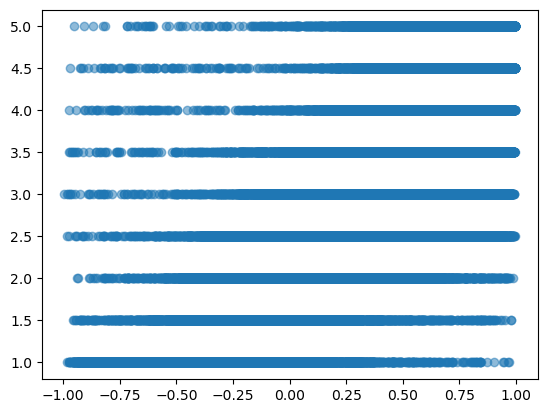

In [ ]:
from matplotlib import pyplot as plt
# plot average_review_sentiment against stars here
plt.scatter('average_review_sentiment', 'stars', alpha=0.5, data=df)


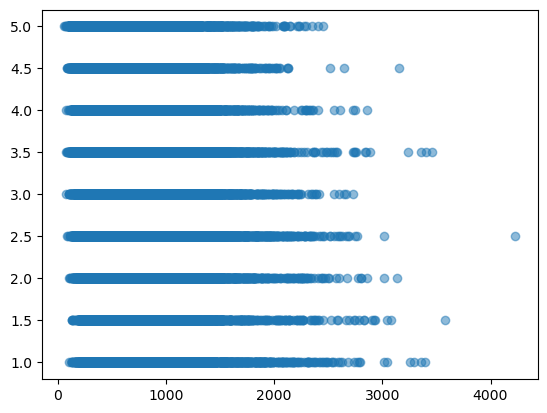

In [ ]:
# plot average_review_length against stars here
plt.scatter('average_review_length', 'stars', alpha=0.5, data=df)

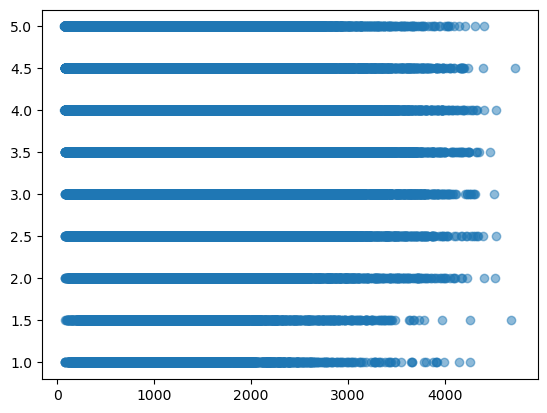

In [ ]:
# plot average_review_age against stars here
plt.scatter('average_review_age', 'stars', alpha=0.5, data=df)


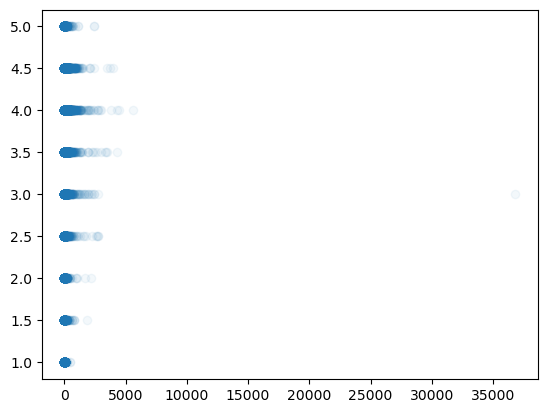

In [ ]:
# plot number_funny_votes against stars here
plt.scatter('number_funny_votes', 'stars', alpha=.05, data=df)

<Axes: >

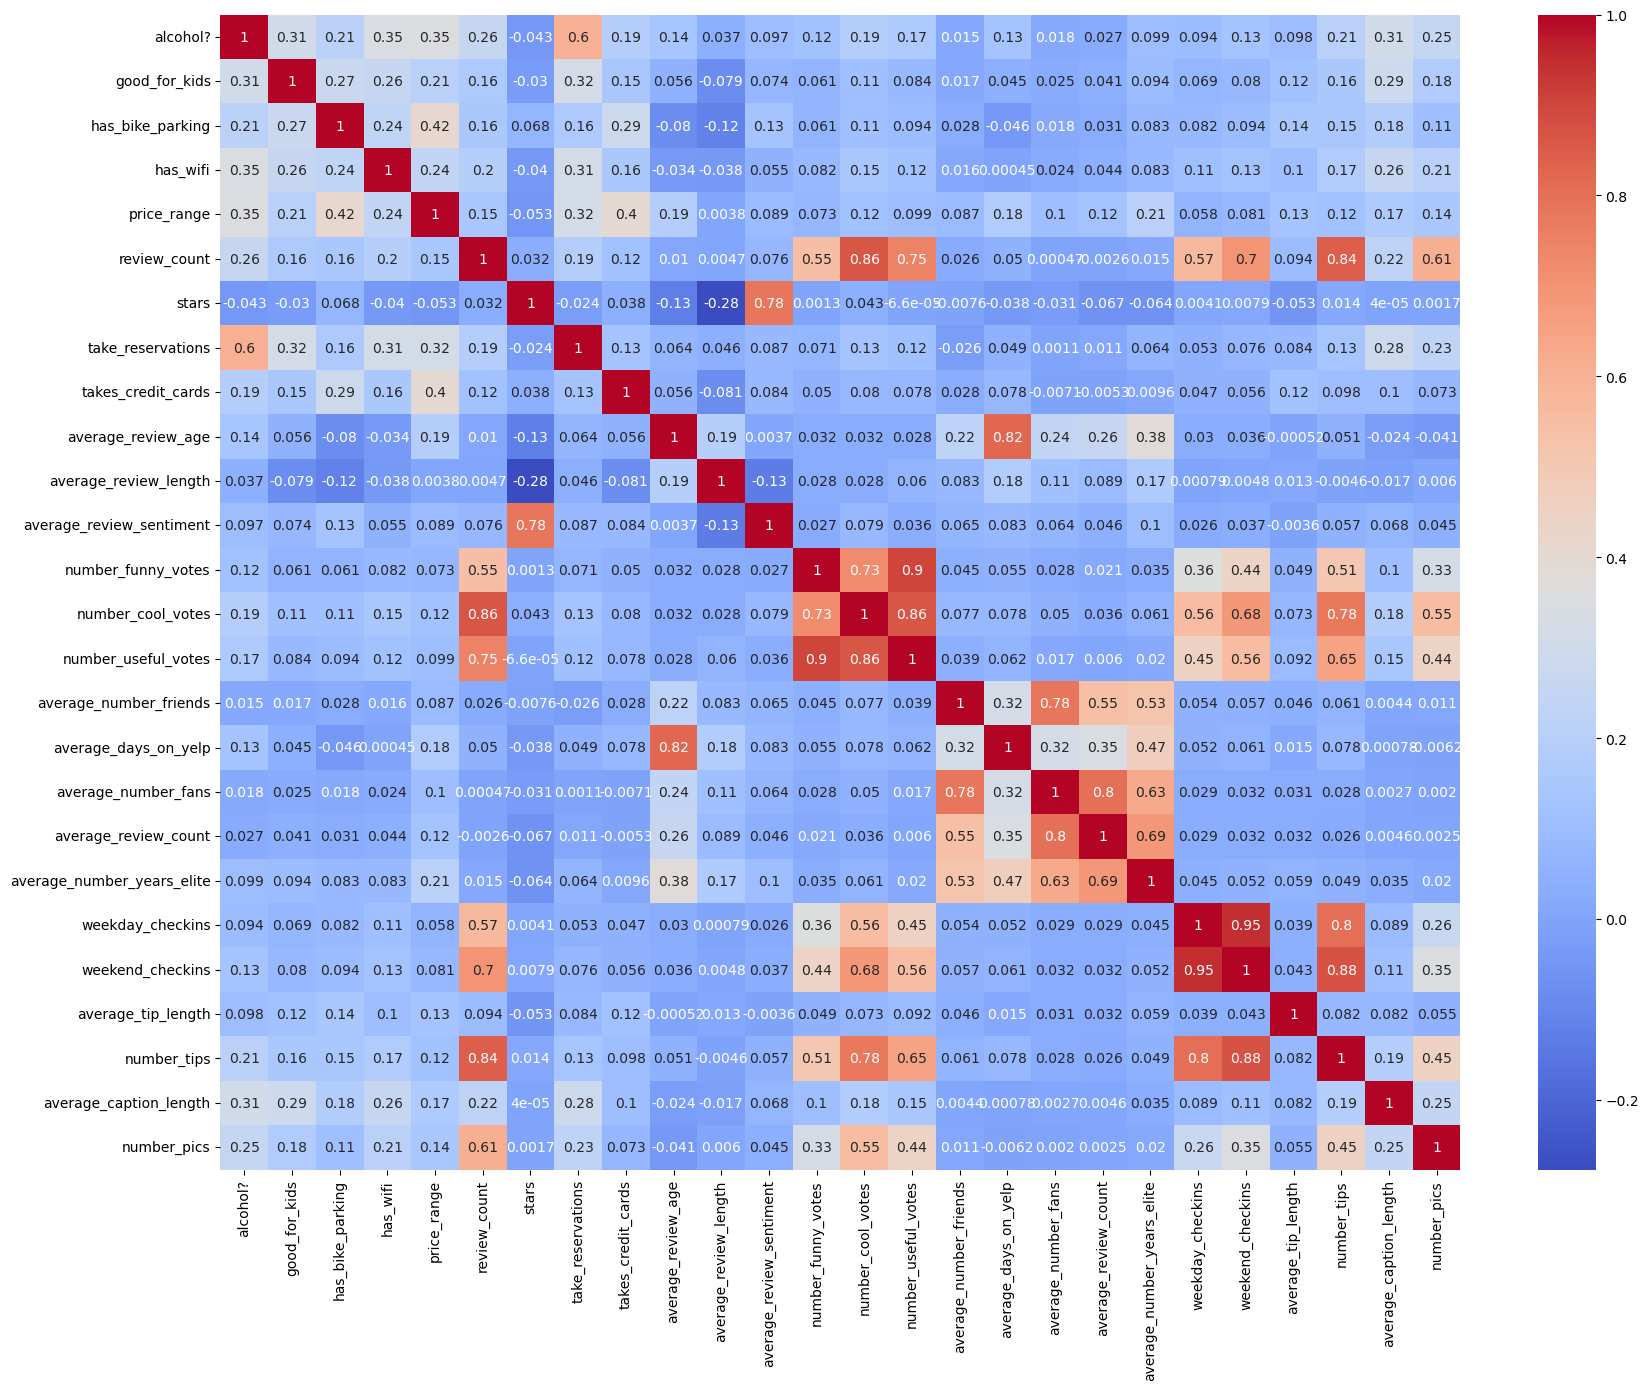

In [ ]:
import seaborn as sns
heatmap = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(heatmap, annot=True, cmap='coolwarm')

The above charts indicate that `average_review_sentiment` correlates so well with Yelp rating.

I believe that text sentiment is feeling from the reviewer and is dedrived from the language used in reviews. Since users typically express positive experiences using positive language and negative experiences using negative language, sentiment scores and star ratings are closely aligned. This results in a strong positive correlation between 'average_review_sentiment' and Yelp rating.

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's create our first model with `average_review_length` and `average_review_age` as features.

In [ ]:
list_of_features_to_select = [ 'average_review_length', 'average_review_age']
features =df[list_of_features_to_select]
# features = df[['average_review_length','average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

We are just about ready to model! But first, we need to break our data into a training set and a test set so we can evaluate how well our model performs. We'll use scikit-learn's `train_test_split` function to do this split, which is provided in the cell below. We will use this function that takes two required parameters: the data, or our features, followed by our dependent variable, in our case the Yelp rating. I will set the optional parameter `test_size` to be `0.2`. Finally, set the optional parameter `random_state` to `42`.

Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state = 1)



## Create and Train the Model

Now that our data is split into training and testing sets, we can finally model! In the cell below we have provided the code to import `LinearRegression` from scikit-learn's `linear_model` module. Create a new `LinearRegression` object named model. The `.fit()` method will fit our Linear Regression model to our training data and calculate the coefficients for our features. Call the `.fit()` method on `model` with `X_train` and `y_train` as parameters. Just like that our model has now been trained on our training data!

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [ ]:
print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')

The R^2 score for the training set is 0.08250309566544889
The R^2 score for the test set is 0.08083081210060561


I don't these these features alone can effective predict Yelp ratings.

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [ ]:
sorted(list(zip(['average_review_length','average_review_age'],lr.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', np.float64(-0.0009977176852074552)),
 ('average_review_age', np.float64(-0.00011621626836366472))]

This shows that the average review length is a better predictor of the star rating than the average review age. This makes sense because longer reviews tend to be more detailed and thoughtful, which can give a better indication of the quality of the business.

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating. Call `.predict()` on `X_test` and assign the values to `y_predicted`. Use Matplotlib to plot `y_test` vs `y_predicted`. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

In [ ]:
y_predicted = lr.predict(X_test)

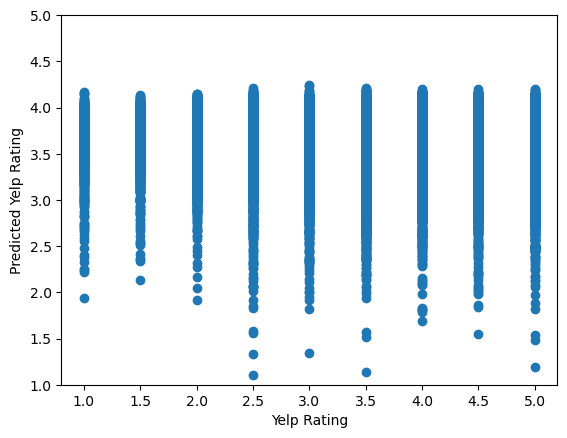

In [ ]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

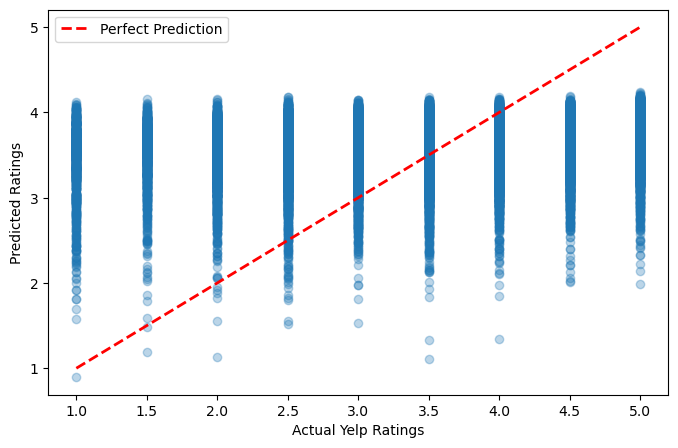

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predicted, alpha = 0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--', color = 'red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Yelp Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Yelp Ratings')
plt.legend()

## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model! In the cells below we have provided different lists of subsets of features that we will model with and evaluate. What other subsets of features would you want to test? Why do you think those feature sets are more predictive of Yelp rating than others? Create at least one more subset of features that you want to predict Yelp ratings from.

In [ ]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

features =df[sentiment]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')

The R^2 score for the training set is 0.6118980950438655
The R^2 score for the test set is 0.6114021046919492


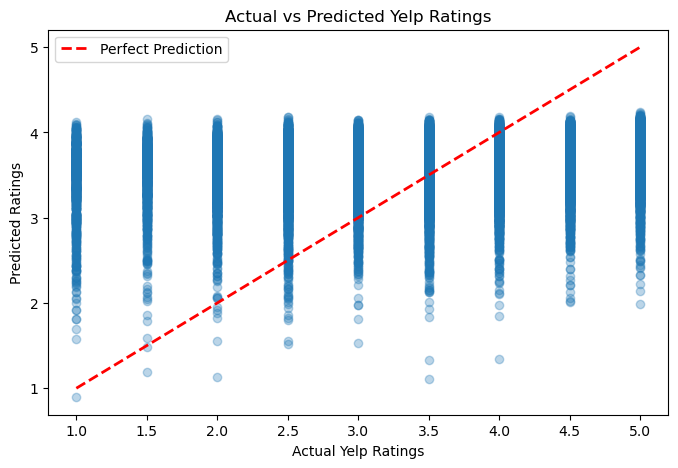

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predicted, alpha = 0.3)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--', color = 'red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Yelp Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Yelp Ratings')
plt.legend()

In [ ]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
features = df[binary_features]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')

The R^2 score for the training set is 0.011735345953256426
The R^2 score for the test set is 0.012290954852992475


In [ ]:
df.corr().sort_values(by='stars', ascending=False)['stars']


stars                         1.000000
average_review_sentiment      0.782187
has_bike_parking              0.068084
number_cool_votes             0.043375
takes_credit_cards            0.037748
review_count                  0.032413
number_tips                   0.014038
weekend_checkins              0.007863
weekday_checkins              0.004130
number_pics                   0.001727
number_funny_votes            0.001320
average_caption_length        0.000040
number_useful_votes          -0.000066
average_number_friends       -0.007629
take_reservations            -0.024486
good_for_kids                -0.030382
average_number_fans          -0.031141
average_days_on_yelp         -0.038061
has_wifi                     -0.039857
alcohol?                     -0.043332
price_range                  -0.052565
average_tip_length           -0.052899
average_number_years_elite   -0.064419
average_review_count         -0.066572
average_review_age           -0.125645
average_review_length    

In [ ]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
features = df[numeric_features]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')

The R^2 score for the training set is 0.6735553358009632
The R^2 score for the test set is 0.6270767721982771


In [ ]:
# all features
all_features = binary_features + numeric_features
features = df[all_features]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')

The R^2 score for the training set is 0.681062028344379
The R^2 score for the test set is 0.6260287151151058


In [ ]:
# Use features larger than 0.1
feature_important = ['average_review_sentiment', 'has_bike_parking', 'number_cool_votes', 'takes_credit_cards', 'review_count','number_tips','take_reservations', 'good_for_kids', 'average_number_fans', 'average_days_on_yelp', 'has_wifi', 'alcohol?', 'price_range', 'average_tip_length', 'average_number_years_elite', 'average_review_count',  'average_review_age', 'average_review_length' ]
# The R^2 score for the training set is 0.6797649787300553
# The R^2 score for the test set is 0.6796480975992998

features = df[feature_important]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'The R^2 score for the training set is {lr.score(X_train, y_train)}')
print(f'The R^2 score for the test set is {lr.score(X_test, y_test)}')


The R^2 score for the training set is 0.6797649787300553
The R^2 score for the test set is 0.6796480975992998


## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process we just completed with our first model! Fill in the empty comments with an explanation of the task the code beneath it is performing.

In [ ]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):

    #
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]

    #
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 42)

    # This for loop allows the model to work when we model on just one feature instead of multiple features.
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)

    #
    model = LinearRegression()
    model.fit(X_train,y_train)

    #
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))

    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))

    #
    y_predicted = model.predict(X_test)

    #
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

Train Score: 0.6123198185525099
Test Score: 0.609771685784544
[('average_review_sentiment', np.float64(2.3018351776022565))]


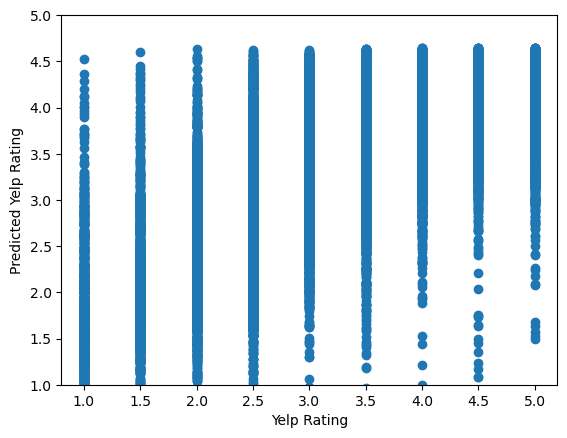

In [ ]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.011735345953256426
Test Score: 0.012290954852992475
[('has_bike_parking', np.float64(0.18611498649110006)), ('alcohol?', np.float64(-0.14513798366928193)), ('has_wifi', np.float64(-0.1268793237211076)), ('good_for_kids', np.float64(-0.08389407923138405)), ('takes_credit_cards', np.float64(0.07018512247359929)), ('take_reservations', np.float64(0.041557095514934826))]


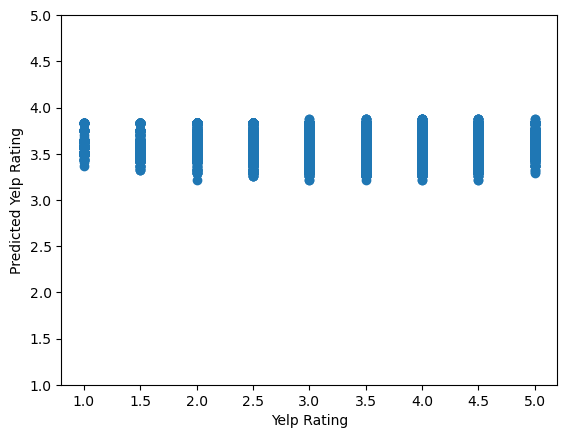

In [ ]:
# create a model on all binary features here
model_these_features(binary_features);

Train Score: 0.6735553358009632
Test Score: 0.6270767721982771
[('average_review_sentiment', np.float64(2.264680879170441)), ('price_range', np.float64(-0.08034467956072036)), ('average_number_years_elite', np.float64(-0.0727931134746473)), ('average_caption_length', np.float64(-0.0034478198674015395)), ('number_pics', np.float64(-0.0031867391102819)), ('number_cool_votes', np.float64(0.0018938192862979068)), ('number_tips', np.float64(-0.0016425212163692754)), ('number_funny_votes', np.float64(-0.0012866413962881783)), ('average_number_fans', np.float64(0.0009076918176409792)), ('average_review_length', np.float64(-0.0005781809789478234)), ('average_tip_length', np.float64(-0.0005364852699438412)), ('average_review_count', np.float64(-0.00021164900495912808)), ('number_useful_votes', np.float64(-0.00017543545395645418)), ('average_review_age', np.float64(-0.00016057858073020053)), ('average_days_on_yelp', np.float64(0.00012420868164760216)), ('average_number_friends', np.float64(6.277

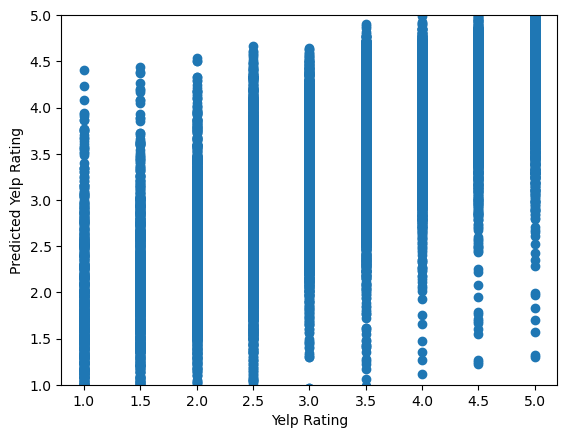

In [ ]:
# create a model on all numeric features here
model_these_features(numeric_features);

Train Score: 0.681062028344379
Test Score: 0.6260287151151058
[('average_review_sentiment', np.float64(2.2738316565494174)), ('alcohol?', np.float64(-0.14940026251659447)), ('has_wifi', np.float64(-0.12245636818166442)), ('good_for_kids', np.float64(-0.12232829722411151)), ('price_range', np.float64(-0.06391757607451883)), ('average_number_years_elite', np.float64(-0.06362933508113205)), ('has_bike_parking', np.float64(0.025238961175046995)), ('takes_credit_cards', np.float64(0.022097328864484456)), ('take_reservations', np.float64(0.013755359135038205)), ('number_cool_votes', np.float64(0.001764086663658146)), ('number_pics', np.float64(-0.0014958042938373701)), ('number_funny_votes', np.float64(-0.0013207267601977948)), ('number_tips', np.float64(-0.000974680858439916)), ('average_number_fans', np.float64(0.0008928820329970918)), ('average_caption_length', np.float64(-0.0006956696307614046)), ('average_review_length', np.float64(-0.000587439587078762)), ('average_tip_length', np.floa

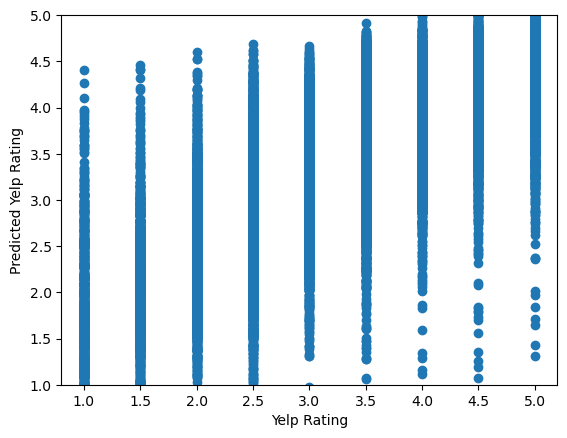

In [ ]:
# create a model on all features here
model_these_features(all_features);

Train Score: 0.6797649787300553
Test Score: 0.6796480975992998
[('average_review_sentiment', np.float64(2.2838222506184205)), ('alcohol?', np.float64(-0.15327253155872528)), ('has_wifi', np.float64(-0.12361343779914621)), ('good_for_kids', np.float64(-0.12302907148142896)), ('price_range', np.float64(-0.0646418570082312)), ('average_number_years_elite', np.float64(-0.06210088146755164)), ('has_bike_parking', np.float64(0.026870174191201846)), ('takes_credit_cards', np.float64(0.02231877982468934)), ('take_reservations', np.float64(0.011856351957520474)), ('average_number_fans', np.float64(0.0011055349624761626)), ('number_tips', np.float64(-0.0007831506271619684)), ('average_review_length', np.float64(-0.0005964049131445335)), ('number_cool_votes', np.float64(0.0005011345363609484)), ('average_tip_length', np.float64(-0.000439061664009088)), ('average_review_count', np.float64(-0.00023067584285227393)), ('average_review_age', np.float64(-0.00015180134470767795)), ('average_days_on_yelp

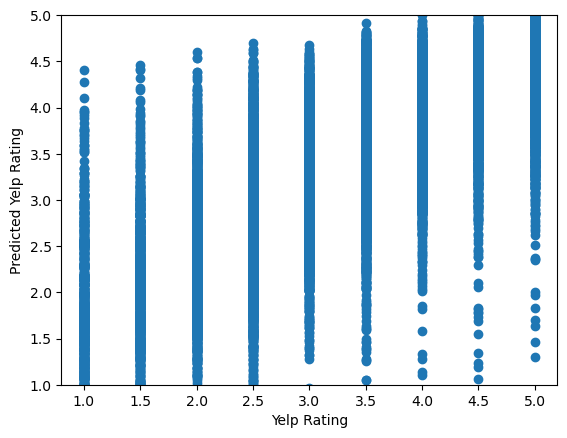

In [ ]:
# create a model on your feature subset here
model_these_features(feature_important);

## Discovery:
* When the random_state is set to 1, 'all_features' model performs better than the 'feature_important' model, but the difference was minimal. However, when the random_state is set to 42, 'feature_important' R^2 test performs much better.
* The difference in performance across random states indicates that the model using all features has higher variance and is more sensitive to how the data is split.
* In some splits, weak predictive features lead to overfitting, resulting in a large gap between training and test R². The reduced feature set (feature_important) is more stable across splits, suggesting better generalization..
* The reduced feature set will also improve interpretability and reduces noise while maintaining very comparable predictive performance.
* However, if we need to use regularization (Ridge/Lasso) or tree-based models, then we will opt for 'all_features'.

## Danielle's Delicious Delicacies' Debut

I've loaded the data, cleaned it, modeled it, and evaluated it. I am tired, but glowing with pride after all the hard work. I close my eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will my Yelp rating be? Let's use our model to make a prediction.

From our experiment, the feature_important is our best model, which uses features that have larger than 0.01 correlation to 'stars', so we'll work with this model again. In the cell below is the 'feature_important' list as a reminder of what features we are working with.

In [ ]:
print(f'Here is the list of the features used in feature_important:')
display(feature_important)

Here is the list of the features used in feature_important:


['average_review_sentiment',
 'has_bike_parking',
 'number_cool_votes',
 'takes_credit_cards',
 'review_count',
 'number_tips',
 'take_reservations',
 'good_for_kids',
 'average_number_fans',
 'average_days_on_yelp',
 'has_wifi',
 'alcohol?',
 'price_range',
 'average_tip_length',
 'average_number_years_elite',
 'average_review_count',
 'average_review_age',
 'average_review_length']

In [ ]:

features = df.loc[:,feature_important]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))


Train Score: 0.6802434323083584
Test Score: 0.6777031597743062


To give us some perspective on the restaurants already out there, here are the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [ ]:
features.describe().loc[['mean', 'min', 'max']].T.reset_index().rename(columns={'index':'Feature'})

,Feature,mean,min,max
0,average_review_sentiment,0.554935,-0.995200,0.996575
1,has_bike_parking,0.350692,0.000000,1.000000
2,number_cool_votes,18.495973,0.000000,6572.000000
3,takes_credit_cards,0.700243,0.000000,1.000000
4,review_count,31.797310,3.000000,7968.000000
5,number_tips,6.285217,0.000000,3581.000000
6,take_reservations,0.106086,0.000000,1.000000
7,good_for_kids,0.279029,0.000000,1.000000
8,average_number_fans,11.590148,0.000000,1174.666667
9,average_days_on_yelp,2005.367009,76.000000,4860.000000


Based on the plans for the restaurant, the following is how I will expect our customers to post on our Yelp page. I will fill in the blanks in the NumPy array below with our desired values. average_review_sentiment' and the last blank corresponds to the feature at ``index=17``, `average_review_length`. I will enter either `0` or `1` for all binary features and enter the mean if the value is uncertin. After I enter the values, I will run the prediction cell below to receive the Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [ ]:
danielles_delicious_delicacies = np.array([.555, 0, 18.5, 1, 32, 6.3, 0, 0, 11.6, 2005, 1, 0, 1, 45.6, 0.92, 122, 1176, 596]).reshape(1,-1)

In [ ]:
danielle_df = pd.DataFrame(
    danielles_delicious_delicacies,
    columns=feature_important
)

model.predict(danielle_df)


array([3.57639763])

## Further Feathers

I You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As we have found out, it can be pretty hard to predict a rating like this even when we have a plethora of data. Other features that are not included in this DataFrame include:
Does this restaurant have an app?
Does this restaurant have social media presence, such as Facebook or Instagram?
Does this restaurant deliver?
Does this restaurant have a reward for loyal customers?
What is the price range for the restaurant and if the pricing is reasonable for the neighborhood?

Even if we have all the data needed, there are still questions or insights that we like to analyze such as:

* Can we predict the cuisine of a restaurant based on the users that review it?
* How does social media status affect a restaurant's credibility and visibility?
* How much financial impact will the rating affect the restaurant?

As I progress further into the field of data science, I want to be able to create models that address these questions and produce buinsess insights!